In [12]:
import torch
from transformers import pipeline

# model_id = "meta-llama/Llama-3.2-3B-Instruct"
model_id = "/gpfs/projects/bsc14/abecerr1/hub/models--meta-llama--Llama-3.2-3B-Instruct/snapshots/0cb88a4f764b7a12671c53f0838cd831a0843b95"
pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype=torch.bfloat16,
    # device="cuda",
    device_map="auto",
)

terminators = [
    pipe.tokenizer.eos_token_id,
    pipe.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Device set to use cuda:0


In [13]:
from src.data import files_to_df

sample_df_gen = files_to_df("output/samples/en/phase_2/generated")
sample_df_gen["filenameid"] = sample_df_gen["filenameid"].str.replace("_transformed_step1", "")

sample_df_orig = files_to_df("output/samples/en/phase_2/original")
sample_df = sample_df_orig.merge(sample_df_gen, on="filenameid", suffixes=("_orig", "_gen"))
sample_df

,filenameid,text_orig,text_gen
0,32153696,An 80-year-old man who worked as a constructio...,**Discharge Summary**\n\n**Patient Information...
1,32470561,A 46-years-old female was admitted to our depa...,**Discharge Summary**\n\n**Patient Information...
2,29617510,An 81-year-old male patient was admitted due t...,**Discharge Summary**\n\n**Patient Information...
3,38422307,A 43-year-old female patient with uterine diff...,**Discharge Summary**\n\n**Patient Information...
4,31204375,A 92-year-old man was admitted to our hospital...,**Discharge Summary**\n\n**Patient Information...
5,35414581,Patient information\nA woman in her 70s diagno...,**Discharge Summary**\n\n**Patient Information...
6,30072860_2,A 72-year-old man with a history of hypertensi...,**Discharge Summary**\n\n**Patient Information...
7,31056078,"Initial presentation\nA 55-year-old, Caucasian...",**Discharge Summary**\n\n**Patient Information...
8,31486515,A 57-year-old Caucasian man was admitted to th...,**Discharge Summary**\n\n**Patient Information...
9,34962277,"A 60-year-old gentleman, with a history of dia...",**Discharge Summary**\n\n**Patient Information...


In [14]:

ocr = "First with a hood and stick in hand... After arresting protesters... What is it called??? or Carlos Roman Hamu"
text = ""

messages = [
        {"role": "system", "content": "You are an expert recovering the image of a post from a social media platform only using the text and OCR of the post. do it in less than 512 tokens."\
                "Complete the post with the information from the image. Be concise and provide proper names if necessary. Be 100% confident in your answer. Provide only the description of the image."\
                 "Provide always a description even if you don't know the answer without justifying your decision just as if it was real. Talk only about the content not your reasoning.",},
        {"role": "user", "content": "The OCR of the post is: " + ocr + " The text of the post is: " + text},]
outputs = pipe(
            messages,
            max_new_tokens=32,
            temperature=0.1,
            eos_token_id=terminators,
            pad_token_id=pipe.tokenizer.eos_token_id,
        )

outputs

[{'generated_text': [{'role': 'system',
    'content': "You are an expert recovering the image of a post from a social media platform only using the text and OCR of the post. do it in less than 512 tokens.Complete the post with the information from the image. Be concise and provide proper names if necessary. Be 100% confident in your answer. Provide only the description of the image.Provide always a description even if you don't know the answer without justifying your decision just as if it was real. Talk only about the content not your reasoning."},
   {'role': 'user',
    'content': 'The OCR of the post is: First with a hood and stick in hand... After arresting protesters... What is it called??? or Carlos Roman Hamu The text of the post is: '},
   {'role': 'assistant', 'content': 'Police brutality'}]}]

In [15]:

import json

def evaluate_clinical_summaries(clinical_case, discharge_summary, output_file=None):
    """
    Evaluate clinical case summaries against discharge summaries.
    
    Args:
        clinical_cases (list): List of clinical case texts.
        discharge_summaries (list): List of discharge summary texts.
        output_file (str): Path to save the output dictionary.
        generate_score (callable): Function to generate scores using the AI model.
    
    Returns:
        None
    """
    gen_dictionary = {}
    
    prompt = f"""Look at these guidelines carefully, i have also provided the dataset for you to analyze:

        Guidelines : One of the main bottlenecks for the development of clinical NLP resources if the lack of access to clinical records due to data privacy issues. This is particularly true for developments beyond English, as most of the accessible anonymized clinical record datasets are only available for this language.
        To examine if clinical case report publications could potentially be considered as a data source to generate synthetic clinical discharge summaries by means of generative AI solutions, prompt instructions combined with automatic clinical were applied.

        This structured summary has the purpose to systematically characterize the clinical language characteristics of synthetic discharge summaries.

        Each discharge summary was assessed for a predefined set of features.

        Likert scale features (to extract statistics) from 1 to 5:

        - Content Relevance: Does the summary focus on clinically relevant information
        - Information Completeness: Does the summary include all key details (diagnoses, treatments, follow-ups)?
        - Clarity and Structure: Is the information presented in a clear and logically structured manner like a real discharge report?
        - Content Accuracy: Does the report accurately reflect the clinical information provided in the input?
        - Hallucinations: Are there any factual inaccuracies or fabricated content in the summary?
        - Impact of Hallucinations: How severe are these hallucination (e.g. 1-2: Irrelevant content, 3: include details about the patients not in original, 4-5: medication doses, procedures, etc)
        - Relevance to Practice: Would this summary be usable in clinical practice without significant revision?
        - Overall Quality: How would you rate the overall quality of the discharge summary?

        Free text features to be commented in error analysis. Not mandatory but open to express as much or as few as wanted.
        - Positive/Negative highlights of generation process
        - Other comments on Generated/Original data sources

        Clinical Case : {clinical_case}

        Discharge Summary : {discharge_summary}

        Using these clinical case and discharge summary, evaluate and provide a score (1 to 5) for each feature listed above in the guidlines.
        Only provide numeric scores for each feature; do not include comments or explanations.
        Ensure that each score reflects a direct comparison of the clinical case and its corresponding discharge summary.
        Just provide the score for each feature, do not provide any additional information. 
        Do not include any comments or explanations. before or after the scores

        Evaluate from 1 to five and return a json file with the following format:
        
        "Content Relevance": <score>, "Information Completeness": <score>, "Clarity and Structure": <score>, "Content Accuracy": <score>, "Hallucinations": <score>, "Impact of Hallucinations": <score>, "Relevance to Practice": <score>, "Overall Quality": <score>, "Positive/Negative highlights of generation process": <text>, "Other comments on Generated/Original data sources": <text>

        """
        
    system_msg = "You are an expert in cardiology and you are asked to be very critical in your evaluation. Provide a score from 1 to 5 for each feature listed in the guidelines."
        
    messages = [
        {"role": "system", "content": system_msg},
        {"role": "user", "content": prompt},]
        # response = generate_score(prompt)
        
    outputs = pipe(
                    messages,
                    max_new_tokens=256,
                    temperature=0.01,
                    eos_token_id=terminators,
                    pad_token_id=pipe.tokenizer.eos_token_id,
                )
        # print(f"\nSCORE FOR SCALE FEATURES FOR CLINICAL CASE {i} AND DISCHARGE SUMMARY {i}:")
        # for chunk in stream:
        #     content = chunk['message']['content']  
        #     print(content, end='', flush=True)
        # gen_dictionary[i] = content

        # if i % 10 == 0:
        #     print(f"Processed {i}/{len(clinical_cases)} records")
    
    # if output_file is not None:
    #     with open(output_file, "w") as f:
    #         f.write(json.dumps(gen_dictionary, indent=4))

    try:
        return json.loads(outputs[0]["generated_text"][-1]["content"])
    except:
        print(outputs[0]["generated_text"][-1]["content"])
        return None

    
# output_file = "output.txt"
    # Call the evaluation function
    
clinical_case = sample_df["text_orig"].iloc[0]
discharge_summary = sample_df["text_gen"].iloc[0]

evaluate_clinical_summaries(clinical_case, discharge_summary)


{'Content Relevance': 5,
 'Information Completeness': 5,
 'Clarity and Structure': 5,
 'Content Accuracy': 5,
 'Hallucinations': 1,
 'Impact of Hallucinations': 1,
 'Relevance to Practice': 5,
 'Overall Quality': 5,
 'Positive/Negative highlights of generation process': 'The generated discharge summary accurately reflected the clinical information provided in the input.',
 'Other comments on Generated/Original data sources': 'The generated discharge summary was well-structured and easy to understand, with no significant differences between the original clinical case and the generated discharge summary.'}

In [16]:
from tqdm import tqdm
tqdm.pandas()

In [17]:
import swifter

In [18]:
scores = sample_df.progress_apply(lambda x: evaluate_clinical_summaries(x["text_orig"], x["text_gen"]), axis=1)

100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


In [21]:
import pandas as pd

In [22]:

sample_df_scores = pd.concat([sample_df, pd.DataFrame(scores.tolist())], axis=1).rename(columns={0: "scores"})

In [23]:
sample_df_scores.columns

Index(['filenameid', 'text_orig', 'text_gen', 'Content Relevance',
       'Information Completeness', 'Clarity and Structure', 'Content Accuracy',
       'Hallucinations', 'Impact of Hallucinations', 'Relevance to Practice',
       'Overall Quality', 'Positive/Negative highlights of generation process',
       'Other comments on Generated/Original data sources'],
      dtype='object')

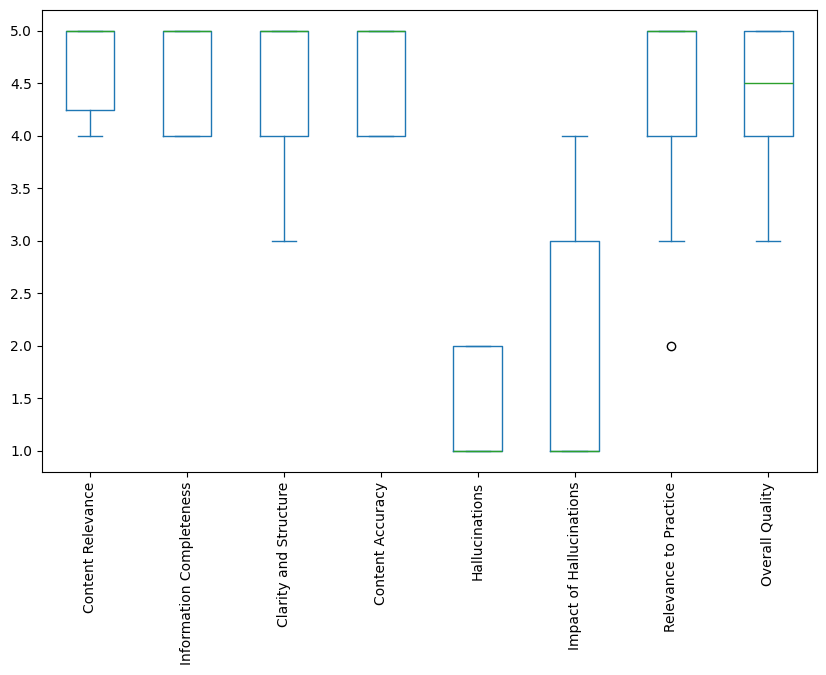

In [24]:
import matplotlib.pyplot as plt

sample_df_scores.plot(kind="box", y=['Content Relevance',
       'Information Completeness', 'Clarity and Structure', 'Content Accuracy',
       'Hallucinations', 'Impact of Hallucinations', 'Relevance to Practice',
       'Overall Quality'],
               figsize=(10, 6))
plt.xticks(rotation=90);

In [29]:
sample_df_scores[sample_df_scores["Other comments on Generated/Original data sources"] != ""]["Other comments on Generated/Original data sources"].tolist()

['The generated discharge summary was well-structured and easy to understand, with no significant differences between the original clinical case and the generated discharge summary.',
 "The original clinical case provides detailed information about the patient's condition and the Heartfelt device's functionality.",
 'The original clinical case was well-documented, but the generated discharge summary could benefit from more specific medication dosages and treatment plans.',
 'The original clinical case and discharge summary were well-structured and provided sufficient information for the generation of the discharge summary.',
 'The generated discharge summary accurately reflects the clinical information provided in the input clinical case.',
 'The original clinical case and discharge summary are well-structured and easy to understand.',
 'The generated discharge summary accurately reflects the clinical information provided in the input clinical case.',
 'The generated discharge summary 